# Tugas 2 Clustering Lokasi Gerai Kopi
Analisis menggunakan KMeans, Agglomerative, dan DBSCAN.
---
Dataset: `lokasi_gerai_kopi_clean.csv`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
    
plt.style.use("fivethirtyeight")


In [3]:
df = pd.read_csv("lokasi_gerai_kopi_clean.csv")
df.head()

,x,y,population_density,traffic_flow,competitor_count,is_commercial
0,37.454012,39.363552,6684.383436,1117.611140,1,1
1,95.071431,47.343566,444.735522,490.055410,0,0
2,73.199394,85.454739,1176.914042,749.731899,0,0
3,59.865848,34.000439,6077.576901,1472.876645,7,1
4,15.601864,86.964968,746.725028,341.217897,2,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   x                   5000 non-null   float64
 1   y                   5000 non-null   float64
 2   population_density  5000 non-null   float64
 3   traffic_flow        5000 non-null   float64
 4   competitor_count    5000 non-null   int64  
 5   is_commercial       5000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 234.5 KB


,x,y,population_density,traffic_flow,competitor_count,is_commercial
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.683199,49.148712,2491.160729,872.511776,1.245600,0.209000
std,28.963365,28.561651,2612.296151,507.898212,1.697721,0.406635
min,0.001163,0.005283,-896.454829,137.156691,0.000000,0.000000
25%,24.386281,24.714591,526.124599,505.271579,0.000000,0.000000
50%,50.000863,48.597157,1415.856705,632.545237,1.000000,0.000000
75%,74.810086,73.337160,3829.213717,1175.367340,2.000000,0.000000
max,99.971767,99.950519,10746.183375,2289.863074,10.000000,1.000000


In [5]:
X = df[["x", "y"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.42227173, -0.34263212],
       [ 1.56724783, -0.06320808],
       [ 0.81201017,  1.27127308],
       ...,
       [-0.58351664,  1.59397761],
       [ 1.10120245, -0.3291425 ],
       [ 0.34695705, -0.9606383 ]], shape=(5000, 2))

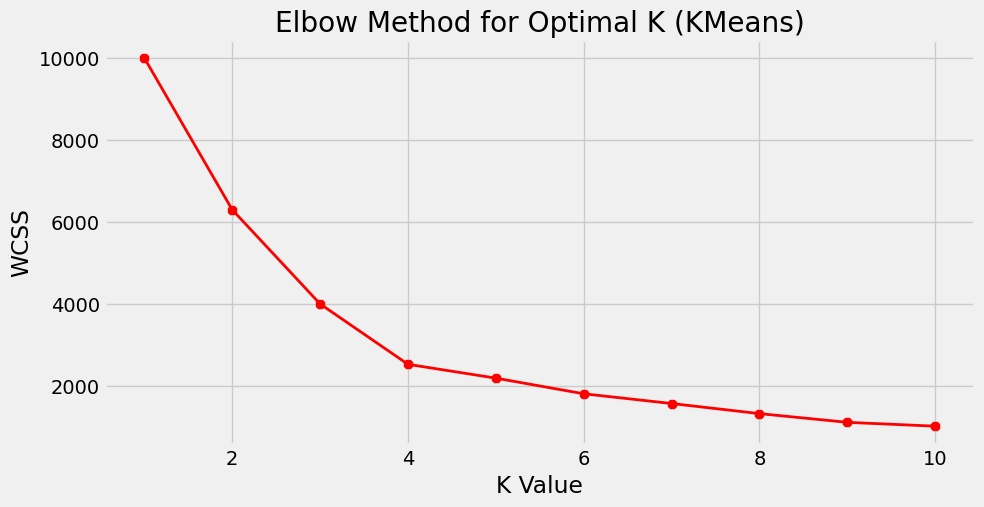

In [6]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='8', color="red", linewidth=2)
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K (KMeans)")
plt.show()

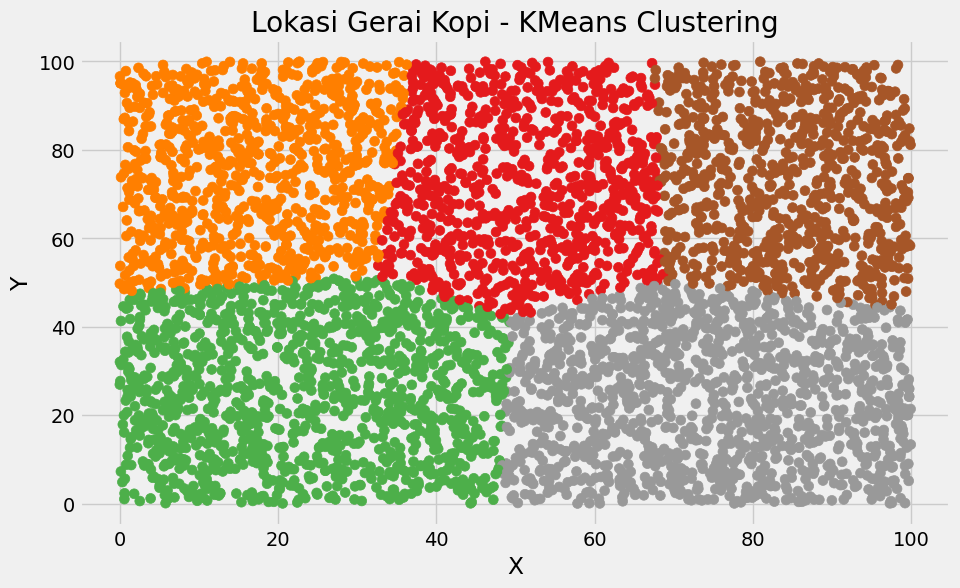

In [6]:
km = KMeans(n_clusters=5, random_state=42)
df["kmeans_label"] = km.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df["x"], df["y"], c=df["kmeans_label"], cmap="Set1", s=50)
plt.title("Lokasi Gerai Kopi - KMeans Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

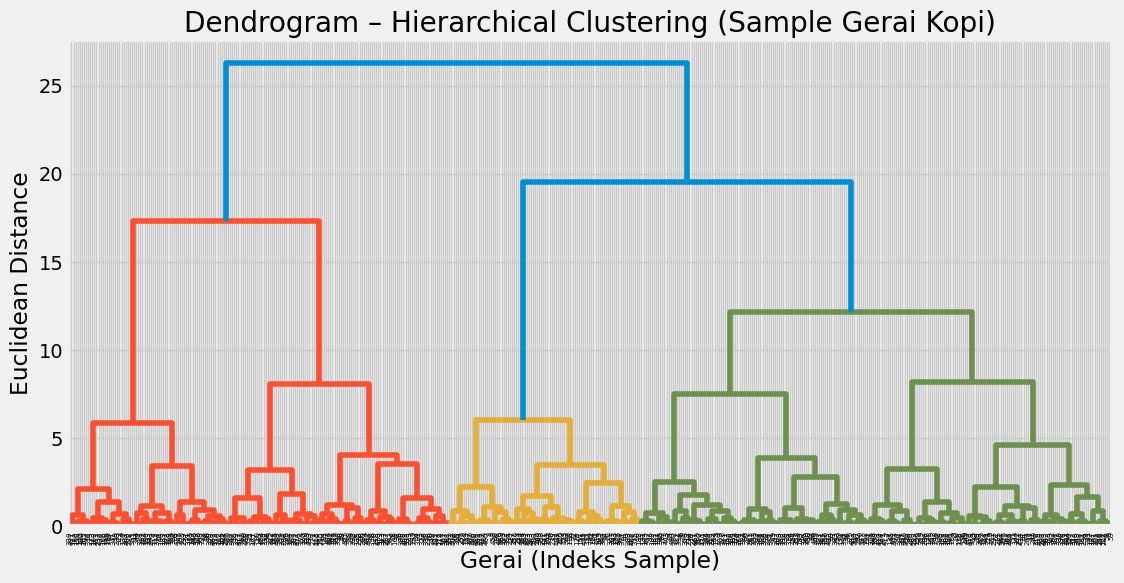

In [7]:
sample_df = df.sample(500, random_state=42)
sample_X_scaled = scaler.fit_transform(sample_df[["x", "y"]])

linkage_matrix = sch.linkage(sample_X_scaled, method="ward")

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram – Hierarchical Clustering (Sample Gerai Kopi)")
plt.xlabel("Gerai (Indeks Sample)")
plt.ylabel("Euclidean Distance")
plt.show()

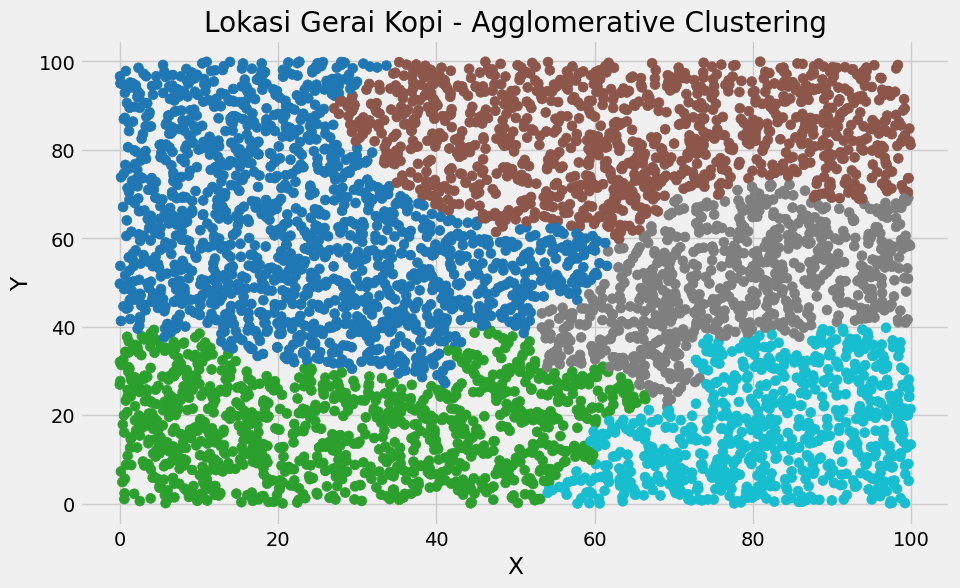

In [8]:
agglo = AgglomerativeClustering(n_clusters=5)
df["agglo_label"] = agglo.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df["x"], df["y"], c=df["agglo_label"], cmap="tab10", s=50)
plt.title("Lokasi Gerai Kopi - Agglomerative Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

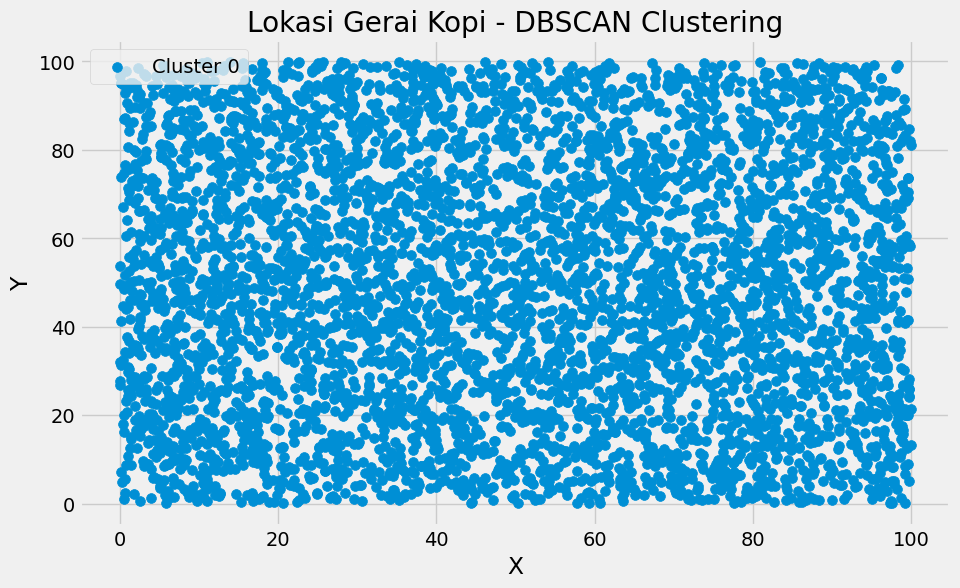

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["dbscan_label"] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
unique_labels = set(df["dbscan_label"])
for label in unique_labels:
    cluster = df[df["dbscan_label"] == label]
    if label == -1:
        plt.scatter(cluster["x"], cluster["y"], c='red', marker='x', s=50, label='Noise')
    else:
        plt.scatter(cluster["x"], cluster["y"], s=50, label=f'Cluster {label}')
plt.title("Lokasi Gerai Kopi - DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [10]:
print("KMeans Cluster Distribution:")
print(df["kmeans_label"].value_counts())

print("\nAgglomerative Cluster Distribution:")
print(df["agglo_label"].value_counts())

print("\nDBSCAN Cluster Distribution:")
print(df["dbscan_label"].value_counts())

KMeans Cluster Distribution:
kmeans_label
4    1243
1    1226
0     874
2     857
3     800
Name: count, dtype: int64

Agglomerative Cluster Distribution:
agglo_label
0    1462
2    1085
1    1039
3     731
4     683
Name: count, dtype: int64

DBSCAN Cluster Distribution:
dbscan_label
0    5000
Name: count, dtype: int64
